In [3]:
import sys
sys.path.append('/global/homes/h/hmarti21/Pipeline')
import particleFileIO
import corFunc
import numpy as np
from matplotlib import pyplot as plt

import importlib
reload=importlib.reload
import corFunc
reload(corFunc)
import corFunc


In [4]:
filename='/global/u2/h/hmarti21/data_sukhdeep.hdf5'
col_names={'x':'halos.x','y':'halos.y','z':'halos.z','mass':'halos.mass','q':'shapesStar.q2d','ax':'shapesStar.a2d_x','ay':'shapesStar.a2d_y','bx':'shapesStar.b2d_x','by':'shapesStar.b2d_y'}    #,'e1':None,'e2':None}
cuts='/global/u2/h/hmarti21/cuts.txt'
sightBins=3
rscale=5
nbins=10
min_sep=1000
max_sep=10000
rpar_step=10000
min_box=0
max_box=100000
key='hydro_full'
logfile='/global/u2/h/hmarti21/log.txt'
savefile='/global/u2/h/hmarti21/data.txt'

filepath='/global/cscratch1/sd/sukhdeep/snapdir_194/snapshot_194.'
col_def=[('Position', ('f8', 3), 'all'), ('Mass','auto',None)]
fraction=0.05
num_files=1
ptype=1
particleFileIO.particleFile(filepath,col_def,fraction,num_files,ptype)
particles=particleFileIO.readFITSFile('/global/homes/h/hmarti21/hmarti21_sampledData.fits')
NNPairs=np.zeros((sightBins,nbins))
NRPairs=np.zeros((sightBins,nbins))
RRPairs=np.zeros((sightBins,nbins))
RNPairs=np.zeros((sightBins,nbins))

print(filename,col_names,cuts,sightBins,rscale,nbins,min_sep,max_sep,rpar_step,min_box,max_box,logfile,savefile,key)
NNPairs,NRPairs,RNPairs,RRPairs=corFunc.corFunc(filename,col_names,cuts,sightBins,rscale,nbins,min_sep,max_sep,rpar_step,min_box,max_box,'NN',logfile,savefile,key=key) #fname2=particles)

/global/u2/h/hmarti21/data_sukhdeep.hdf5 {'x': 'halos.x', 'y': 'halos.y', 'z': 'halos.z', 'mass': 'halos.mass', 'q': 'shapesStar.q2d', 'ax': 'shapesStar.a2d_x', 'ay': 'shapesStar.a2d_y', 'bx': 'shapesStar.b2d_x', 'by': 'shapesStar.b2d_y'} /global/u2/h/hmarti21/cuts.txt 3 5 10 1000 10000 10000 0 100000 /global/u2/h/hmarti21/log.txt /global/u2/h/hmarti21/data.txt hydro_full
0 100000 0.24516684634656727 99999.77359004041
[ 20330.  29115.  41651.  59457.  84306. 118727. 169043. 242814. 351167.
 511000.]
[  43574.   67986.  107940.  171153.  270306.  427509.  680074. 1079664.
 1719620. 2730000.]
[  207565.   324281.   503965.   782922.  1210376.  1862737.  2863393.
  4393472.  6697681. 10192323.]
[  8923.  14210.  22246.  35250.  55347.  87848. 138257. 217540. 338414.
 531060.]
[  39047.   61335.   97219.  153937.  244275.  386300.  609546.  970136.
 1547930. 2476842.]
[  188772.   296483.   470728.   741008.  1170528.  1842946.  2913153.
  4613477.  7292392. 11511484.]
[  7257.  11162.  17

In [5]:
import numpy as np
data=np.loadtxt('/global/homes/h/hmarti21/data.txt')
print(data)

[[4.60947692e+00 4.38775914e+00 4.16188540e+00 3.97593273e+00
  3.78617489e+00 3.61941822e+00 3.49132780e+00 3.35191459e+00
  3.18873715e+00 3.03130707e+00]
 [4.06646707e-04 2.58660735e-04 1.64496259e-04 1.04890035e-04
  6.68505294e-05 4.27009906e-05 2.72572643e-05 1.73805255e-05
  1.10983305e-05 7.09530767e-06]]


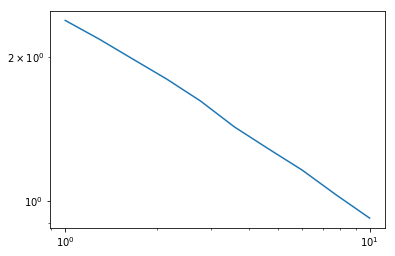

In [38]:
from matplotlib import pyplot as plt
plt.plot(np.logspace(0,1,10),data[0])
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.plot(np.logspace(0,1,10),data[0])
plt.xscale('log')

In [ ]:
plt.plot(np.logspace(0,1,10),1/np.logspace(0,1,10))
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.plot(np.arange(10),np.logspace(0,1,10))
plt.xscale('log')

In [5]:
NNPairs

array([[ 20330.,  29115.,  41651.,  59457.,  84306., 118727., 169043.,
        242814., 351167., 511000.],
       [  8923.,  14210.,  22246.,  35250.,  55347.,  87848., 138257.,
        217540., 338414., 531060.],
       [  7257.,  11162.,  17449.,  27524.,  43847.,  69410., 113597.,
        181393., 286621., 449188.],
       [  6259.,   9760.,  15244.,  24089.,  38098.,  61767.,  97934.,
        152472., 235989., 369048.],
       [  4718.,   7357.,  11647.,  18896.,  29545.,  47801.,  76708.,
        120805., 187270., 295273.]])

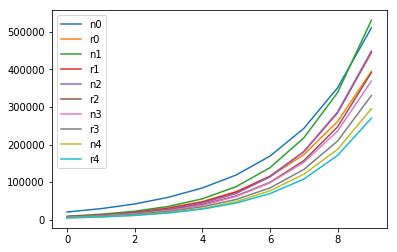

In [27]:
for i in np.arange(sightBins):
    plt.plot(np.arange(nbins),NNPairs[i],label='n'+str(i))
    plt.plot(np.arange(nbins),RRPairs[i],label='r'+str(i))
    plt.legend()

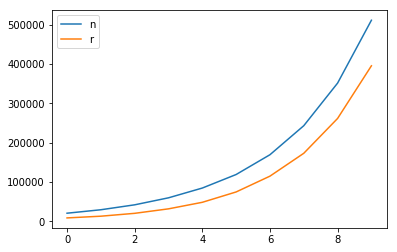

In [31]:
plt.plot(np.arange(nbins),NNPairs[0],label='n')
plt.plot(np.arange(nbins),RRPairs[0],label='r')
plt.legend()

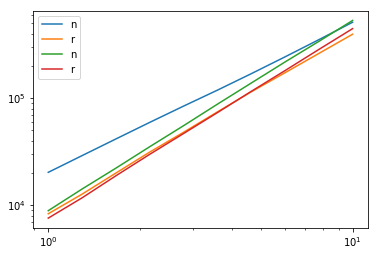

In [32]:
plt.plot(np.logspace(0,1,10),NNPairs[0],label='n')
plt.plot(np.logspace(0,1,10),RRPairs[0],label='r')
plt.plot(np.logspace(0,1,10),NNPairs[1],label='n')
plt.plot(np.logspace(0,1,10),RRPairs[1],label='r')
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [15]:
rpar_step/1000

10.0

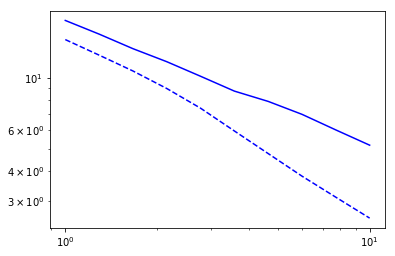

In [19]:
SD=np.sum(NNPairs/RRPairs*rscale**2-1,axis=0)*rpar_step/1000
SD0=(NNPairs[0]/RRPairs[0]*rscale**2-1)*rpar_step/1000
SR=NRPairs[0]/RRPairs[0]*rscale
DR=SR #true only for auto correlation
plt.plot(np.logspace(0,1,10),SD,'b-')
plt.plot(np.logspace(0,1,10),SD0,'b--')
#plt.plot(np.logspace(0,1,10),SR-1,'c-')
#plt.plot(np.logspace(0,1,10),SD-SR-DR+1,'r--')
#plt.plot(np.logspace(0,1,10),data[0],'g--')
plt.xscale('log')
plt.yscale('log')

In [7]:
rb0=np.logspace(0,1,11)
rb=0.5*(rb0[1:]+rb0[:-1])
dr=rb0[1:]-rb0[:-1]

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


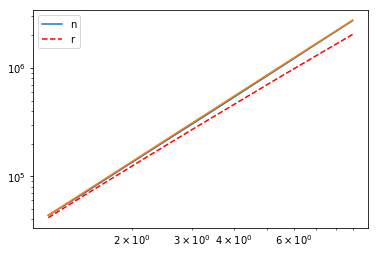

In [9]:
plt.plot(rb,NRPairs[0],label='n')
plt.plot(rb,RRPairs[0]/rscale,'r--',label='r')
plt.plot(rb,rb*dr*1.5e5)
# plt.plot(np.logspace(0,1,10),NNPairs[1],label='n')
# plt.plot(np.logspace(0,1,10),RRPairs[1],label='r')
# plt.plot(np.logspace(0,1,10),NNPairs[2])

plt.legend()
plt.xscale('log')
plt.yscale('log')

In [11]:
??corFunc.NN

In [22]:
np.sum(NNPairs,axis=0)

array([  36510.,   54487.,   81346.,  122231.,  183500.,  275985.,
        420897.,  641747.,  976202., 1491248.])